# Table of contents 
1. [Import Data & Calculate Final Item Score](#import_data)
2. [Output Final Item Score](#output_final_item_score)
3. [Predcit Treatments For New Patients](#predict_treatments_for_new_patients)
    1. [Import New Patient CANS](#import_new_patient_cans)
    2. [Make Predictions](#make_predictions)

In [24]:
import sys
import seaborn as sns

In [4]:
%run decision_support_model.ipynb

In [3]:
#Some useful settings
#np.set_printoptions(threshold=sys.maxsize)
#%pprint
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', None)

## Import Data & Calculate Final Item Score <a name="import_data"></a>

data name: ibhs_all_imp and fbmhs_all_imp

In [5]:
ibhs_df = pd.read_csv('history_dataset/ibhs_all_improv_table_top_level.csv')
fbmh_df = pd.read_csv('history_dataset/fbmhs_all_improv_table.csv')
print("There are ", ibhs_df.shape[0], "IBHS Patients")
print("There are ", fbmh_df.shape[0], "FBMH Patients")
print('Total, we have', ibhs_df.shape[0]+fbmh_df.shape[0], 'patients')

There are  3819 IBHS Patients
There are  2075 FBMH Patients
Total, we have 5894 patients


In [6]:
xneed_real = twosum_improvement_xneed_all(ibhs_df, fbmh_df, batch_num = 10, n = 100)

Using license file /Users/carayi/gurobi.lic
Academic license - for non-commercial use only


In [7]:
xneed_real

array([ 0.742, -0.118, -0.99 ,  0.864, -0.704,  0.516, -0.824,  0.998,
       -0.606,  0.086, -0.956, -1.   , -0.99 , -1.   ,  1.   ,  1.   ,
       -1.   ,  0.998,  1.   ,  1.   ,  1.   ,  0.978, -0.718, -1.   ,
       -1.   , -1.   , -1.   , -1.   , -0.918,  0.056, -1.   , -1.   ,
       -1.   , -0.63 , -1.   ,  1.   , -0.564, -1.   , -0.926, -1.   ,
       -0.94 , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -0.984, -0.99 , -1.   ])

## Output Final Item Score<a name="output_final_item_score"></a>

In [22]:
#dictt = pd.read_csv('clean_fbmh_df.csv')
def map_to_real_need(need):
    return list(dictt.columns).index(need)

def map_to_need(number):
    return list(dictt.columns)[number + 1]

def write_to_final_needs(needs, filename):
    
    # writing to csv file 
    final_need_df = pd.DataFrame()
    final_need_df['needs'] = list(column_names_df['CDR CANS Label'])
    final_need_df['coef'] = final_need

    final_need_df.to_csv(filename, sep='\t')
    with open(filename, 'w') as csvfile: 
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
        
        # writing the fields 
        csvwriter.writerow(column_names) 

        # writing the data rows 
        csvwriter.writerows([list(needs)])

In [23]:
write_to_final_needs(final_need, 'final_need_coefficient.csv')

## Predcit Treatments For New Patients <a name="predict_treatments_for_new_patients"></a> 

### Import New Patient CANS <a name="import_new_patient_cans"></a> 

In [20]:
validate_set_IBHS_raw = pd.read_csv('prediction_dataset/Example Cases for OR analysis - 2022-05-02.xlsx - IBHS_cans.csv')
old_validate_set_IBHS = validate_set_IBHS_raw[validate_set_IBHS_raw['timeline_ibhs'] == 'INITIAL']
validate_set_FBMH_raw = pd.read_csv('prediction_dataset/Example Cases for OR analysis - 2022-05-02.xlsx - FBMH_cans.csv')
old_validate_set_FBMH = validate_set_FBMH_raw[validate_set_FBMH_raw['timeline_fbmh'] == 'INITIAL']
needs_df = pd.read_csv('final_need_coefficient.csv')
needs = needs_df.to_numpy()[0]

column_names = needs_df.columns
validate_set_IBHS = old_validate_set_IBHS[column_names]
validate_set_FBMH = old_validate_set_FBMH[column_names]

print("There are {:,d} new patients".format(validate_set_IBHS.shape[0]+validate_set_FBMH.shape[0]))

There are 18,037 new patients


### Make Predictions <a name="make_predictions"></a> 

In [22]:
IBHS_need_matrix = validate_set_IBHS.to_numpy()
FBMH_need_matrix = validate_set_FBMH.to_numpy()
IBHS_patient_suggest = IBHS_need_matrix@needs
FBMH_patient_suggest = FBMH_need_matrix@needs

Text(0, 0.5, 'Count')

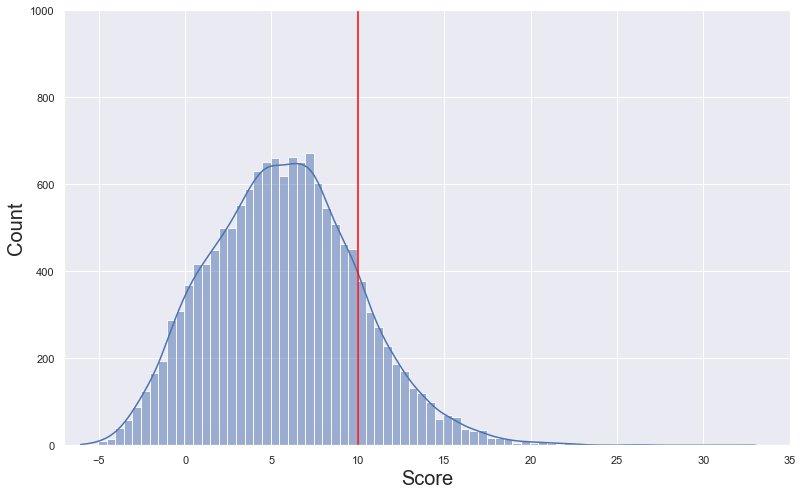

In [25]:
IBHS_patient_result = pd.DataFrame(IBHS_patient_suggest, columns = ['score'])

# Plot the histogram thanks to the distplot function
sns.set(style="darkgrid")
sns.set(font_scale=2)
sns.set(rc = {'figure.figsize':(13,8)})
p = sns.histplot(data=IBHS_patient_result, x="score", kde=True, binwidth = 0.5)
plt.plot([10, 10], [0, 1200], color = 'red') # add a red line at x = 0
plt.ylim(0, 1000)
plt.xlim(-7, 35)
p.set_xlabel('Score', fontsize = 20)
p.set_ylabel('Count', fontsize = 20)
#p.set_title('Total Scores for IBHS Patients', fontsize = 20)

Text(0, 0.5, 'Count')

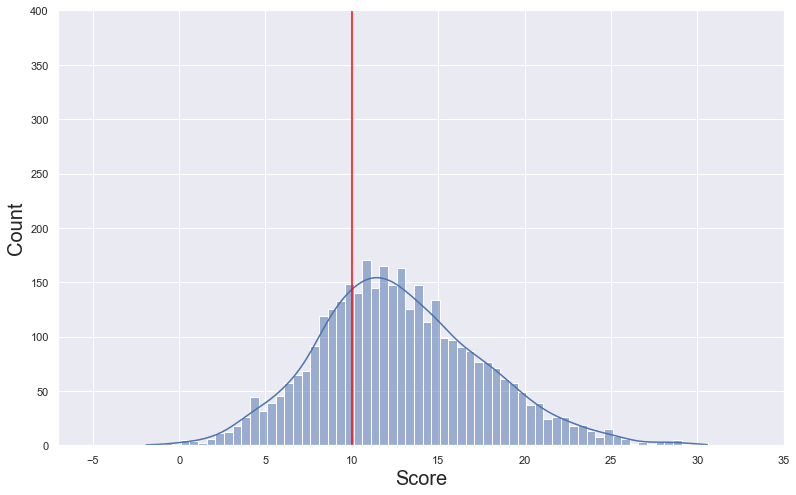

In [26]:
FBMH_patient_result = pd.DataFrame(FBMH_patient_suggest, columns = ['score'])

# Plot the histogram thanks to the distplot function
sns.set(style="darkgrid")
sns.set(font_scale=2)
sns.set(rc = {'figure.figsize':(13,8)})
p = sns.histplot(data=FBMH_patient_result, x="score", kde=True, binwidth = 0.5)
plt.plot([10, 10], [0, 1200], color = 'red') # add a red line at x = 0
plt.ylim(0, 400)
plt.xlim(-7, 35)
p.set_xlabel('Score', fontsize = 20)
p.set_ylabel('Count', fontsize = 20)